## **ABOUT DATASET:-**
>Idea:  Autocomplete and Autocorrect Data Analytics
#Credit Card Fraud Detection.

Anonymized credit card transactions labeled as fraudulent or genuine

In [ ]:
pip install lightgbm

In [ ]:
!pip install lightgbm

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import lightgbm as lgbm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [ ]:
warnings.filterwarnings('ignore')

from contextlib import contextmanager

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

In [ ]:
data = pd.read_csv('/content/creditcard.csv')

In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146647,87799,-1.526981,-1.005619,-0.082273,-0.471613,1.801908,-0.739405,1.286153,-0.574174,0.751797,...,-0.514188,-0.259192,1.262969,0.228528,-0.542067,0.146979,0.109073,-0.329242,52.06,0.0
146648,87802,-0.282443,0.855224,-0.053295,-0.153733,-0.039449,-0.908046,0.377701,0.203070,0.126075,...,0.187684,0.524025,0.020133,-0.004336,-0.640167,-0.403877,-0.095465,0.030439,16.87,0.0
146649,87802,-1.210583,-0.883923,0.085170,-0.082607,2.955753,-1.913757,0.104788,-0.242375,0.108291,...,-0.170043,-0.797627,0.260314,0.526649,-0.015327,-0.670105,-0.170378,-0.110970,9.99,0.0
146650,87802,2.074648,-0.031346,-1.119717,0.378411,-0.046723,-1.123364,0.198939,-0.340896,0.510285,...,-0.296367,-0.703354,0.319490,-0.102920,-0.269098,0.204263,-0.068965,-0.061002,0.89,0.0


from matplotlib import pyplot as plt
_df_16['Time'].plot(kind='hist', bins=20, title='Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['V1'].plot(kind='hist', bins=20, title='V1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['V2'].plot(kind='hist', bins=20, title='V2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['V3'].plot(kind='hist', bins=20, title='V3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='Time', y='V1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='V1', y='V2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='V2', y='V3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='V3', y='V4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V4']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V4')

from matplotlib import pyplot as plt
_df_28['Time'].plot(kind='line', figsize=(8, 4), title='Time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['V1'].plot(kind='line', figsize=(8, 4), title='V1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['V2'].plot(kind='line', figsize=(8, 4), title='V2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['V3'].plot(kind='line', figsize=(8, 4), title='V3')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
display(data.head())
display(data.describe())
display(data.shape)
display(data.info())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,146652.000000,146652.000000,146652.000000,146652.000000,146652.000000,146652.000000,146652.000000,146652.000000,146652.000000,146652.000000,...,146651.000000,146651.000000,146651.000000,146651.000000,146651.000000,146651.000000,146651.000000,146651.000000,146651.000000,146651.000000
mean,53382.668242,-0.251397,0.030252,0.655134,0.130213,-0.270261,0.074889,-0.112135,0.062755,-0.086390,...,-0.038246,-0.116482,-0.031700,0.012248,0.127579,0.022248,0.001547,0.002609,89.939954,0.001923
std,21556.742296,1.819331,1.615526,1.275833,1.330625,1.308624,1.285496,1.165121,1.236206,1.090131,...,0.726807,0.637838,0.588517,0.595815,0.439722,0.492006,0.389396,0.313683,244.862046,0.043809
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,38634.000000,-1.026794,-0.552832,0.154365,-0.725028,-0.896288,-0.667496,-0.601852,-0.132765,-0.710701,...,-0.226452,-0.549466,-0.171440,-0.325642,-0.141062,-0.326776,-0.060499,-0.005165,5.900000,0.000000
50%,55084.500000,-0.277150,0.112315,0.739476,0.157707,-0.305065,-0.182573,-0.059142,0.079890,-0.150431,...,-0.059621,-0.094295,-0.044321,0.068584,0.164341,-0.063498,0.012131,0.023504,23.000000,0.000000
75%,71629.000000,1.158880,0.789690,1.356733,0.984546,0.252211,0.460774,0.416969,0.376067,0.489306,...,0.114486,0.304075,0.084212,0.409229,0.418097,0.286296,0.088843,0.077506,79.990000,0.000000
max,87802.000000,2.356998,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


(146652, 31)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146652 entries, 0 to 146651
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    146652 non-null  int64  
 1   V1      146652 non-null  float64
 2   V2      146652 non-null  float64
 3   V3      146652 non-null  float64
 4   V4      146652 non-null  float64
 5   V5      146652 non-null  float64
 6   V6      146652 non-null  float64
 7   V7      146652 non-null  float64
 8   V8      146652 non-null  float64
 9   V9      146652 non-null  float64
 10  V10     146652 non-null  float64
 11  V11     146652 non-null  float64
 12  V12     146652 non-null  float64
 13  V13     146652 non-null  float64
 14  V14     146652 non-null  float64
 15  V15     146651 non-null  float64
 16  V16     146651 non-null  float64
 17  V17     146651 non-null  float64
 18  V18     146651 non-null  float64
 19  V19     146651 non-null  float64
 20  V20     146651 non-null  float64
 21  V21     14

None

from matplotlib import pyplot as plt
_df_32['Time'].plot(kind='hist', bins=20, title='Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['V1'].plot(kind='hist', bins=20, title='V1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34['V2'].plot(kind='hist', bins=20, title='V2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35['V3'].plot(kind='hist', bins=20, title='V3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='Time', y='V1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='V1', y='V2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='V2', y='V3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='V3', y='V4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V4']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V4')

from matplotlib import pyplot as plt
_df_44['Time'].plot(kind='line', figsize=(8, 4), title='Time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['V1'].plot(kind='line', figsize=(8, 4), title='V1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['V2'].plot(kind='line', figsize=(8, 4), title='V2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['V3'].plot(kind='line', figsize=(8, 4), title='V3')
plt.gca().spines[['top', 'right']].set_visible(False)

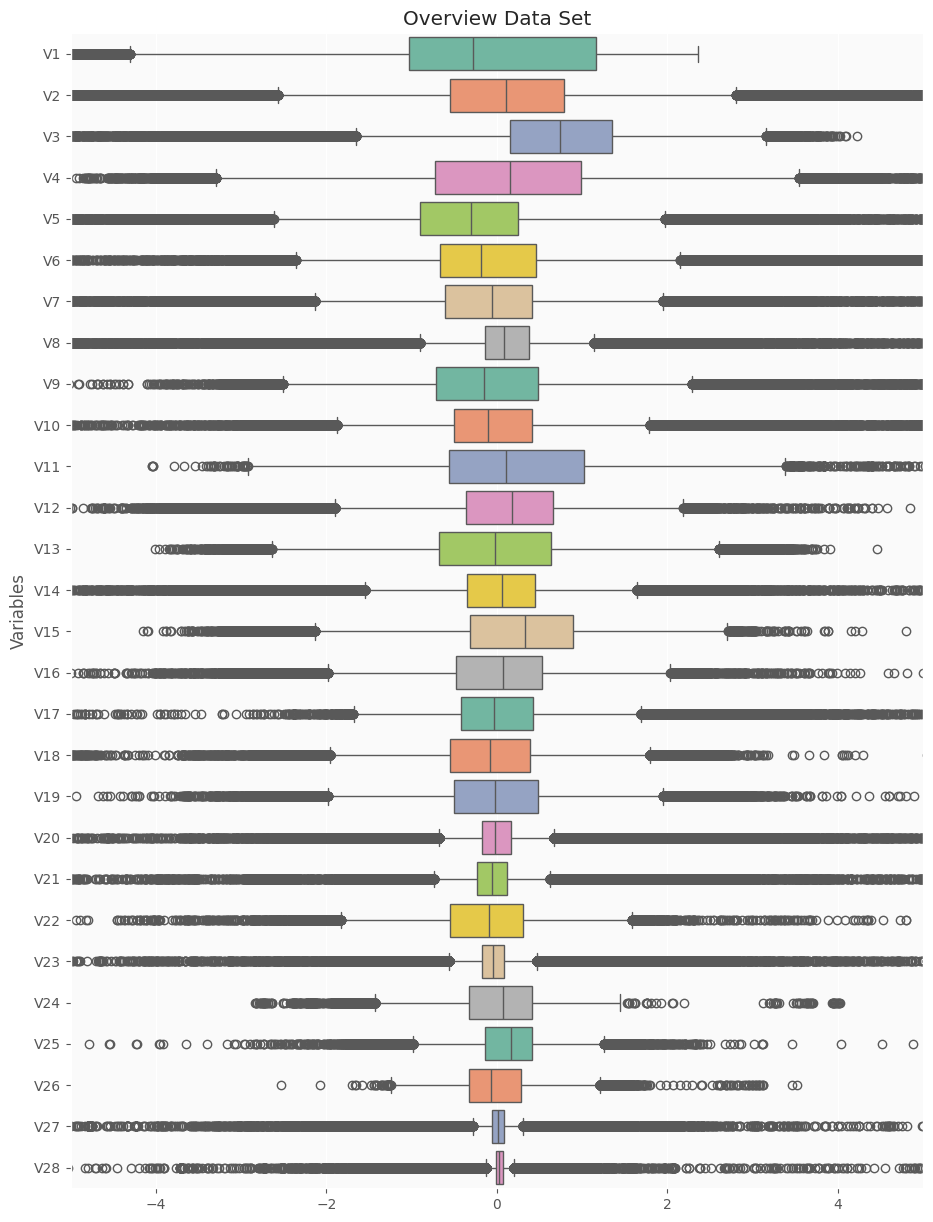

In [ ]:
plt.style.use('ggplot')

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-5, 5))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = data.drop(columns=['Amount', 'Class', 'Time']),
  orient = 'h',
  palette = 'Set2')

In [ ]:
fraud = data[(data['Class'] != 0)]
normal = data[(data['Class'] == 0)]

trace = go.Pie(labels = ['Normal', 'Fraud'], values = data['Class'].value_counts(),
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'],
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of target variable')

fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [ ]:
def plot_distribution(data_select) :
    figsize =( 15, 8)
    sns.set_style("ticks")
    s = sns.FacetGrid(data, hue = 'Class',aspect = 2.5, palette ={0 : 'lime', 1 :'black'})
    s.map(sns.kdeplot, data_select, shade = True, alpha = 0.6)
    s.set(xlim=(data[data_select].min(), data[data_select].max()))
    s.add_legend()
    s.set_axis_labels(data_select, 'proportion')
    s.fig.suptitle(data_select)
    plt.show()

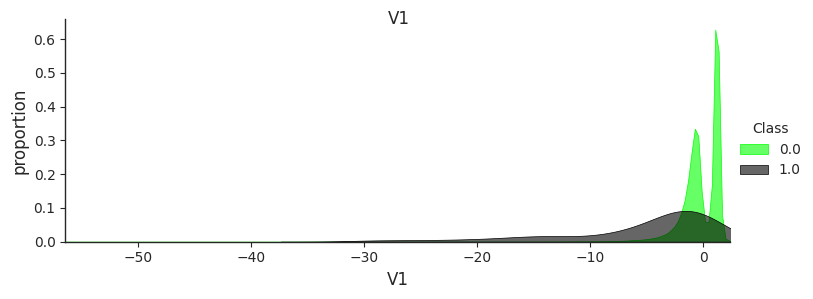

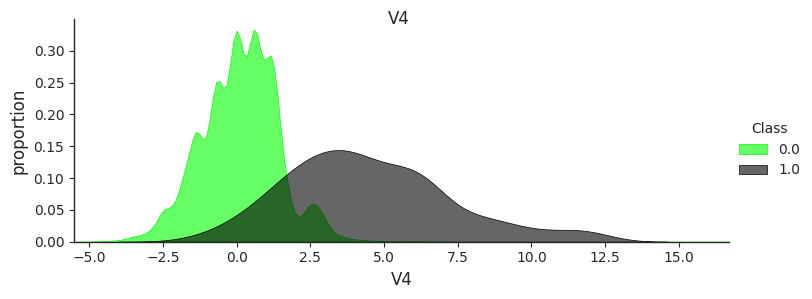

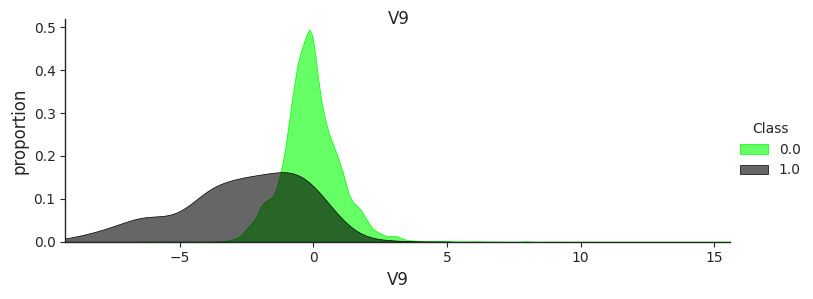

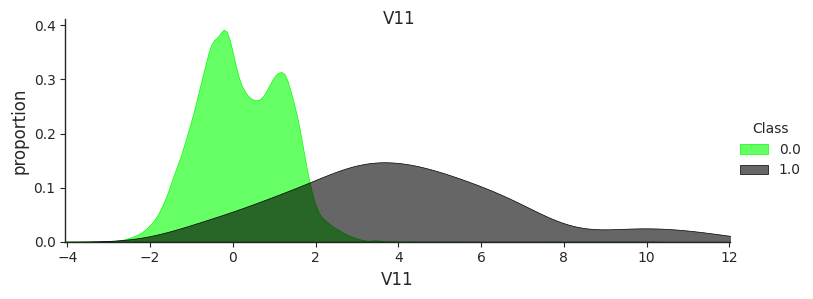

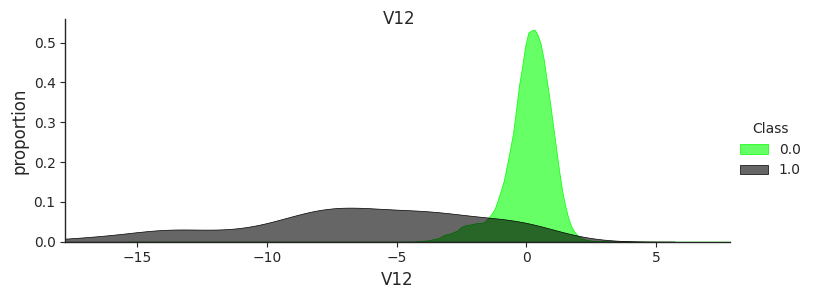

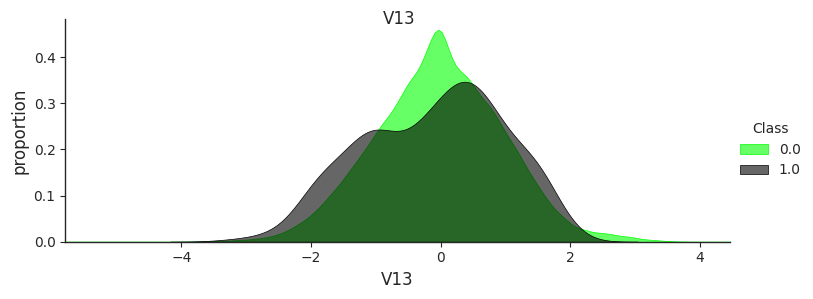

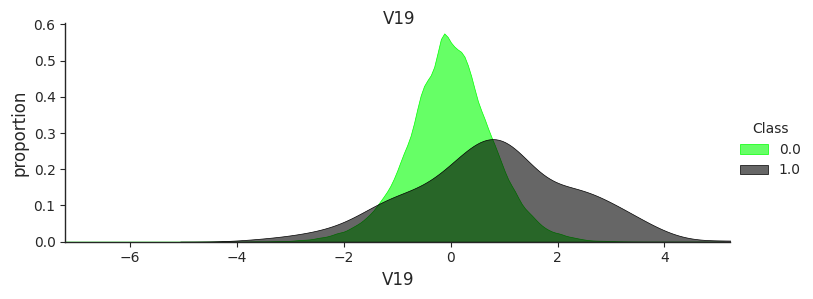

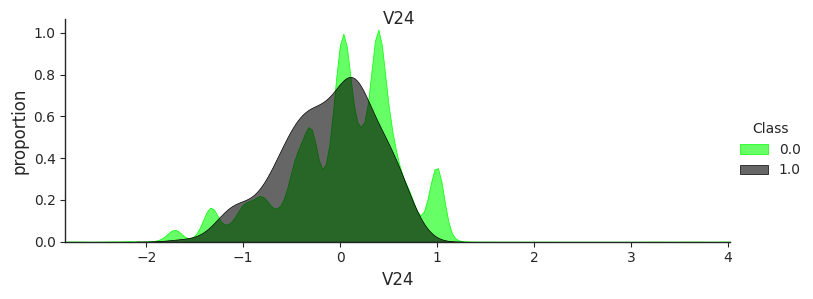

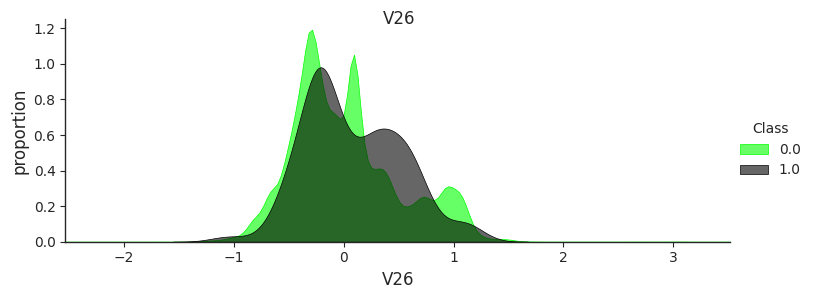

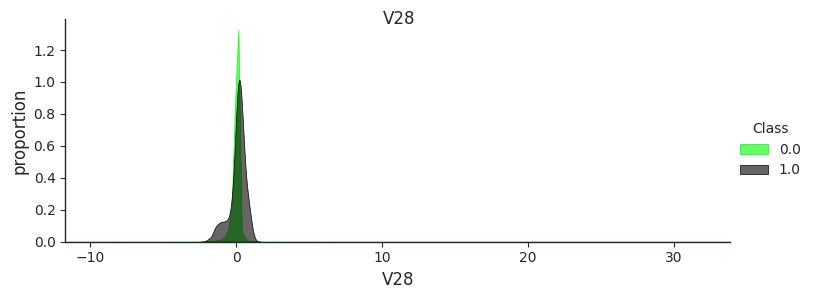

In [ ]:
#plot some randomly



plot_distribution('V1')
#plot_distribution('V2')
#plot_distribution('V3')
plot_distribution('V4')
#plot_distribution('V5')
#plot_distribution('V6')
#plot_distribution('V7')
#plot_distribution('V8')
plot_distribution('V9')
#plot_distribution('V10')
plot_distribution('V11')
plot_distribution('V12')
plot_distribution('V13')
#plot_distribution('V14')
#plot_distribution('V15')
#plot_distribution('V16')
#plot_distribution('V17')
#plot_distribution('V18')
plot_distribution('V19')
#plot_distribution('V20')
#plot_distribution('V21')
#plot_distribution('V22')
#plot_distribution('V23')
plot_distribution('V24')
#plot_distribution('V25')
plot_distribution('V26')
#plot_distribution('V27')
plot_distribution('V28')

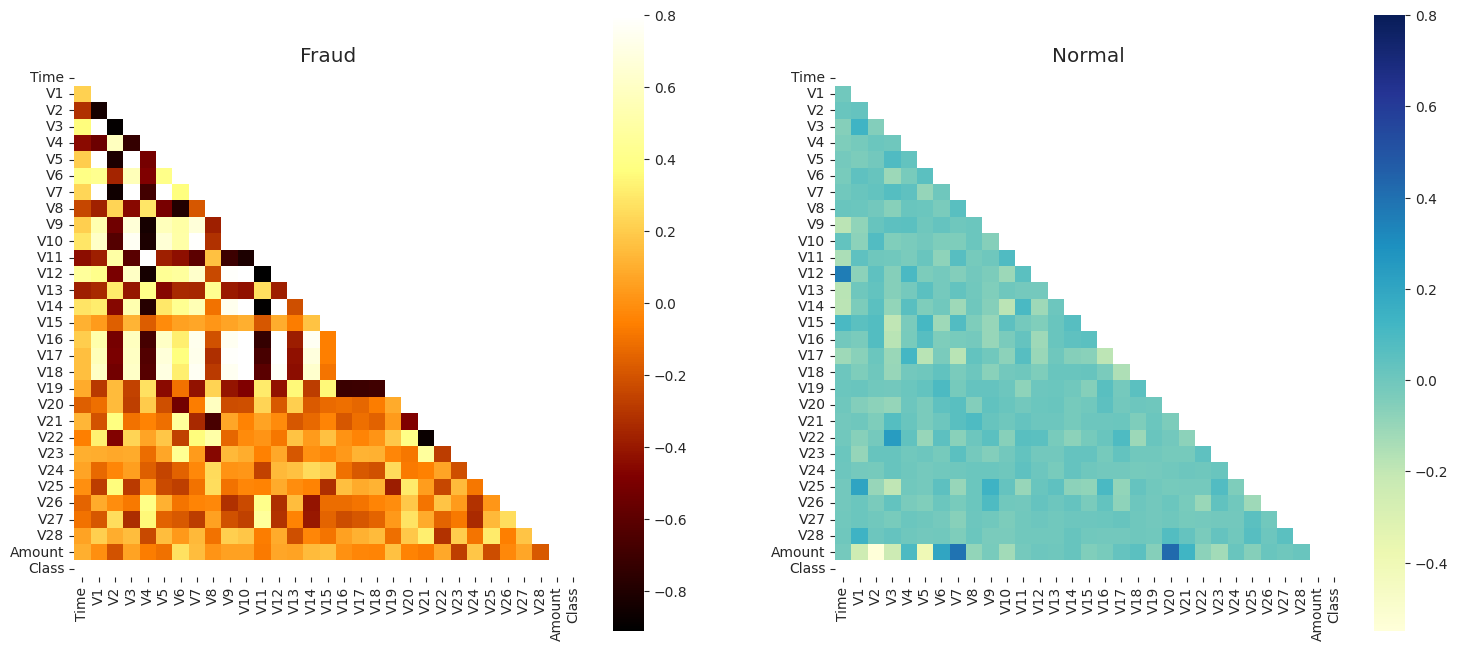

In [ ]:
f, (ax1, ax2) = plt.subplots(1,2,figsize =( 18, 8))
corr = data.corr()
mask = np.zeros_like(corr, dtype=bool)

mask[np.triu_indices_from(mask)] = True
sns.heatmap((data.loc[data['Class'] ==1]).corr(), vmax = .8, square=True, ax = ax1, cmap = 'afmhot', mask=mask);
ax1.set_title('Fraud')
sns.heatmap((data.loc[data['Class'] ==0]).corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu', mask=mask);
ax2.set_title('Normal')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
data['nAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

In [ ]:
data = data.drop(['Amount','Time'],axis=1)

In [ ]:
column_names = data.columns.tolist()
print(column_names)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'nAmount']


In [ ]:
y = np.array(data['V1'].tolist())
data = data.drop('V1', axis=1)
X = np.array(data.values)

In [ ]:
from sklearn.model_selection import train_test_split

random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_state)

In [ ]:
def model_performance(model) :
    #Conf matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)"],
                        y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2,
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values),
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))

    #Roc curve
    model_roc_auc = round(roc_auc_score(y_test, y_score) , 3)
    fpr, tpr, t = roc_curve(y_test, y_score)
    trace3 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))

    # Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')

    #Feature importance
    coefficients  = pd.DataFrame(eval(model).feature_importances_)
    column_data   = pd.DataFrame(list(data))
    coef_sumry    = (pd.merge(coefficients,column_data,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    coef_sumry = coef_sumry[coef_sumry["coefficients"] !=0]
    trace6 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Viridis",
                                  line = dict(width = .6,color = "black")))

    #Cumulative gain
    pos = pd.get_dummies(y_test).as_matrix()
    pos = pos[:,1]
    npos = np.sum(pos)
    index = np.argsort(y_score)
    index = index[::-1]
    sort_pos = pos[index]
    #cumulative sum
    cpos = np.cumsum(sort_pos)
    #recall
    recall = cpos/npos
    #size obs test
    n = y_test.shape[0]
    size = np.arange(start=1,stop=369,step=1)
    #proportion
    size = size / n
    #plots
    model = model
    trace7 = go.Scatter(x = size,y = recall,
                        name = "Lift curve",
                        line = dict(color = ('gold'),width = 2), fill='tozeroy')
    #Subplots
    fig = tls.make_subplots(rows=4, cols=2, print_grid=False,
                          specs=[[{}, {}],
                                 [{}, {}],
                                 [{'colspan': 2}, None],
                                 [{'colspan': 2}, None]],
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        'ROC curve'+" "+ '('+ str(model_roc_auc)+')',
                                        'Precision - Recall curve',
                                        'Cumulative gains curve',
                                        'Feature importance',
                                        ))

    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    fig.append_trace(trace4,2,1)
    fig.append_trace(trace5,2,2)
    fig.append_trace(trace6,4,1)
    fig.append_trace(trace7,3,1)

    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = False, height = 1500,width = 830,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195))
    fig["layout"]["xaxis2"].update((dict(range=[0, 1])))
    fig["layout"]["xaxis3"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis3"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis4"].update(dict(title = "recall"), range = [0,1.05])
    fig["layout"]["yaxis4"].update(dict(title = "precision"), range = [0,1.05])
    fig["layout"]["xaxis5"].update(dict(title = "Percentage contacted"))
    fig["layout"]["yaxis5"].update(dict(title = "Percentage positive targeted"))
    fig.layout.titlefont.size = 14

    py.iplot(fig)



In [ ]:
print("Unique labels in y_train:", np.unique(y_train))

Unique labels in y_train: [-56.40750963 -36.80231991 -36.51058317 ...   2.33092437   2.33565684
   2.35699779]


In [ ]:
import numpy as np

# Check for missing values in y_train (assuming y_train is a NumPy array)
print("Missing values in y_train:", np.isnan(y_train).sum())

Missing values in y_train: 0
